# Preparing the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [1]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [2]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label

data_root = Path("/data/TrainingSet")
image_path = data_root / "images" / "hippocampus_001.nii.gz"
label_path = data_root / "labels" / "hippocampus_001.nii.gz"

image = nib.load(image_path)
label = nib.load(label_path)

print(f"Image loaded: {image_path}")
print(f"Label loaded: {label_path}")
print(f"Image shape: {image.shape}")
print(f"Label shape: {label.shape}")

Image loaded: /data/TrainingSet/images/hippocampus_001.nii.gz
Label loaded: /data/TrainingSet/labels/hippocampus_001.nii.gz
Image shape: (35, 51, 35)
Label shape: (35, 51, 35)


Image data shape: (35, 51, 35)
Label data shape: (35, 51, 35)


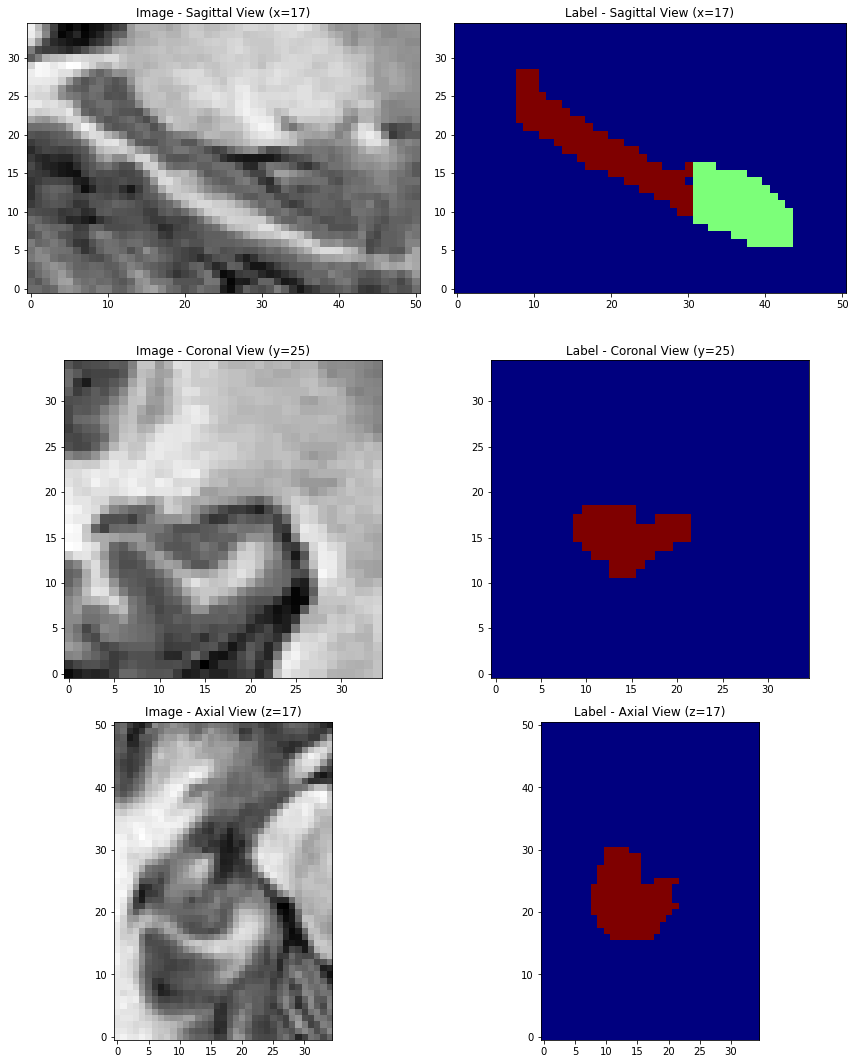

In [3]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?

# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:
# plt.rcParams["figure.figsize"] = (10,10)

# Get numpy arrays from nibabel objects
image_data = image.get_fdata()
label_data = label.get_fdata()

print(f"Image data shape: {image_data.shape}")
print(f"Label data shape: {label_data.shape}")

plt.rcParams["figure.figsize"] = (15, 10)

# Visualize slices from different views
# Show slices from the middle of each dimension
mid_x = image_data.shape[0] // 2
mid_y = image_data.shape[1] // 2
mid_z = image_data.shape[2] // 2

fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Sagittal view (slice along x-axis)
axes[0, 0].imshow(image_data[mid_x, :, :].T, cmap='gray', origin='lower')
axes[0, 0].set_title(f'Image - Sagittal View (x={mid_x})')
axes[0, 1].imshow(label_data[mid_x, :, :].T, cmap='jet', origin='lower')
axes[0, 1].set_title(f'Label - Sagittal View (x={mid_x})')

# Coronal view (slice along y-axis)
axes[1, 0].imshow(image_data[:, mid_y, :].T, cmap='gray', origin='lower')
axes[1, 0].set_title(f'Image - Coronal View (y={mid_y})')
axes[1, 1].imshow(label_data[:, mid_y, :].T, cmap='jet', origin='lower')
axes[1, 1].set_title(f'Label - Coronal View (y={mid_y})')

# Axial view (slice along z-axis)
axes[2, 0].imshow(image_data[:, :, mid_z].T, cmap='gray', origin='lower')
axes[2, 0].set_title(f'Image - Axial View (z={mid_z})')
axes[2, 1].imshow(label_data[:, :, mid_z].T, cmap='jet', origin='lower')
axes[2, 1].set_title(f'Label - Axial View (z={mid_z})')

plt.tight_layout()
plt.show()

Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

In [4]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes

## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [5]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header_class attribute - what is the format of our images?

print(f"Image header class: {image.header_class}")
print(f"Label header class: {label.header_class}")
print(f"\nThe format is: {image.header_class.__name__}")

Image header class: <class 'nibabel.nifti1.Nifti1Header'>
Label header class: <class 'nibabel.nifti1.Nifti1Header'>

The format is: Nifti1Header


Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [6]:
# TASK: How many bits per pixel are used?

bits_per_pixel = image.header['bitpix']
print(f"Bits per pixel: {bits_per_pixel}")
print(f"Data type: {image.get_data_dtype()}")

Bits per pixel: 8
Data type: uint8


In [7]:
# TASK: What are the units of measurement?

# Get units from header
xyzt_units = image.header.get_xyzt_units()
print(f"Spatial units: {xyzt_units[0]}")
print(f"Temporal units: {xyzt_units[1]}")
print(f"\nUnit codes:")
print(f"Space code: {image.header['xyzt_units'] & 0x07}")  # Lower 3 bits for space
print(f"Time code: {image.header['xyzt_units'] & 0x38}")   # Next 3 bits for time

Spatial units: mm
Temporal units: sec

Unit codes:
Space code: 2
Time code: 8


In [8]:
# TASK: Do we have a regular grid? What are grid spacings?

# Get voxel dimensions (pixdim)
voxel_dims = image.header['pixdim'][1:4]  # First element is qfac, so we skip it
print(f"Voxel dimensions (grid spacing): {voxel_dims}")
print(f"X spacing: {voxel_dims[0]} mm")
print(f"Y spacing: {voxel_dims[1]} mm")
print(f"Z spacing: {voxel_dims[2]} mm")

if np.allclose(voxel_dims[0], voxel_dims[1]) and np.allclose(voxel_dims[1], voxel_dims[2]):
    print("\nThis is an isotropic grid (all dimensions equal)")
else:
    print("\nThis is an anisotropic grid (dimensions differ)")

Voxel dimensions (grid spacing): [1. 1. 1.]
X spacing: 1.0 mm
Y spacing: 1.0 mm
Z spacing: 1.0 mm

This is an isotropic grid (all dimensions equal)


In [9]:
# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?

# Get orientation information
affine = image.affine
orientation = nib.aff2axcodes(affine)
print(f"Image orientation: {orientation}")
print(f"Affine transformation matrix:")
print(affine)

print(f"\nImage shape: {image.shape}")
print(f"\nBased on the orientation codes:")
print(f"Dimension 0 (size {image.shape[0]}): {orientation[0]} axis")
print(f"Dimension 1 (size {image.shape[1]}): {orientation[1]} axis")
print(f"Dimension 2 (size {image.shape[2]}): {orientation[2]} axis")

print(f"\nAnatomical plane mappings:")
print(f"- Sagittal slices: cutting along dimension 0 (perpendicular to {orientation[0]} axis)")
print(f"- Coronal slices: cutting along dimension 1 (perpendicular to {orientation[1]} axis)")
print(f"- Axial slices: cutting along dimension 2 (perpendicular to {orientation[2]} axis)")

print(f"\nWe can determine this from:")
print(f"1. The orientation codes derived from the affine matrix")
print(f"2. The shape of the volume (medical scans typically have fewer slices in one direction)")
print(f"3. Visual inspection of the slices showing anatomical structures")

Image orientation: ('R', 'A', 'S')
Affine transformation matrix:
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]

Image shape: (35, 51, 35)

Based on the orientation codes:
Dimension 0 (size 35): R axis
Dimension 1 (size 51): A axis
Dimension 2 (size 35): S axis

Anatomical plane mappings:
- Sagittal slices: cutting along dimension 0 (perpendicular to R axis)
- Coronal slices: cutting along dimension 1 (perpendicular to A axis)
- Axial slices: cutting along dimension 2 (perpendicular to S axis)

We can determine this from:
1. The orientation codes derived from the affine matrix
2. The shape of the volume (medical scans typically have fewer slices in one direction)
3. Visual inspection of the slices showing anatomical structures


In [10]:
# By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# You should get a number between ~2200 and ~4500

# Get the voxel dimensions in mm
voxel_dims = image.header['pixdim'][1:4]
voxel_volume_mm3 = np.prod(voxel_dims)  # Volume of a single voxel in mm³

print(f"Voxel dimensions: {voxel_dims} mm")
print(f"Single voxel volume: {voxel_volume_mm3} mm³")

label_data = label.get_fdata()

# Count non-zero voxels in the label (both class 1 and class 2 are hippocampus)
# Background is 0, anterior is 1, posterior is 2
hippocampus_voxels = np.sum(label_data > 0)

# Calculate total hippocampus volume
hippocampus_volume_mm3 = hippocampus_voxels * voxel_volume_mm3

print(f"\nNumber of hippocampus voxels: {hippocampus_voxels}")
print(f"Hippocampus volume: {hippocampus_volume_mm3:.2f} mm³")
print(f"Hippocampus volume: {hippocampus_volume_mm3/1000:.2f} cm³")

Voxel dimensions: [1. 1. 1.] mm
Single voxel volume: 1.0 mm³

Number of hippocampus voxels: 2948
Hippocampus volume: 2948.00 mm³
Hippocampus volume: 2.95 cm³


## Plotting some charts

Found 262 label files
Processing volumes in parallel using 16 CPU cores...
Processed 20/262 files...
Processed 40/262 files...
Processed 60/262 files...
Processed 80/262 files...
Processed 100/262 files...
Processed 120/262 files...
Processed 140/262 files...
Processed 160/262 files...
Processed 180/262 files...
Processed 200/262 files...
Processed 220/262 files...
Processed 240/262 files...
Processed 260/262 files...

Potential outliers found:
  hippocampus_281.nii.gz - Volume: 95716.21 mm³

Volume statistics:
Mean: 3641.27 mm³
Median: 3326.50 mm³
Std: 5716.58 mm³
Min: 1543.07 mm³
Max: 95716.21 mm³


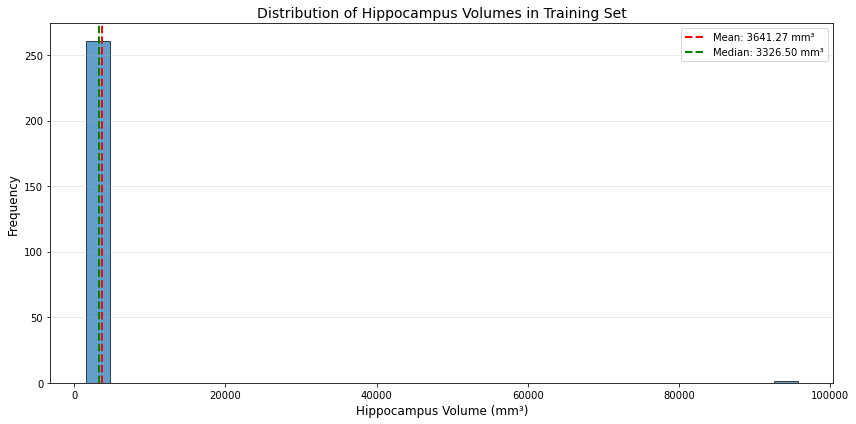


Outliers detected (IQR method):
Lower bound: 1931.12 mm³
Upper bound: 4644.12 mm³
Number of outliers: 2
  hippocampus_010.nii.gz: 1543.07 mm³
  hippocampus_281.nii.gz: 95716.21 mm³


In [11]:
# TASK: Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.

from concurrent.futures import ProcessPoolExecutor, as_completed
from multiprocessing import cpu_count

def calculate_hippocampus_volume(label_path, voxel_volume):
    """Calculate hippocampus volume from a label file"""
    label_nib = nib.load(label_path)
    label_data = label_nib.get_fdata()
    hippocampus_voxels = np.sum(label_data > 0)
    return hippocampus_voxels * voxel_volume

def process_volume_file(label_file):
    """Process a single file and return volume and filename"""
    image_file = Path("/data/TrainingSet/images") / label_file.name
    
    if image_file.exists():
        img = nib.load(image_file)
        voxel_dims = img.header['pixdim'][1:4]
        voxel_volume = np.prod(voxel_dims)
        
        volume = calculate_hippocampus_volume(label_file, voxel_volume)
        
        # Flag potential outliers
        if volume < 1000 or volume > 6000:
            return volume, label_file.name, True
        return volume, label_file.name, False
    return None, None, False

label_dir = Path("/data/TrainingSet/labels")
label_files = sorted(label_dir.glob("*.nii.gz"))

print(f"Found {len(label_files)} label files")
print(f"Processing volumes in parallel using {cpu_count()} CPU cores...")

volumes = []
file_names = []
outlier_files = []

# Parallel processing of volume calculations
max_workers = min(cpu_count(), len(label_files))

with ProcessPoolExecutor(max_workers=max_workers) as executor:
    futures = [executor.submit(process_volume_file, label_file) for label_file in label_files]
    
    completed = 0
    for future in as_completed(futures):
        volume, filename, is_potential_outlier = future.result()
        if volume is not None:
            volumes.append(volume)
            file_names.append(filename)
            if is_potential_outlier:
                outlier_files.append((filename, volume))
        
        completed += 1
        if completed % 20 == 0:
            print(f"Processed {completed}/{len(label_files)} files...")

print(f"\nPotential outliers found:")
for filename, volume in outlier_files:
    print(f"  {filename} - Volume: {volume:.2f} mm³")

volumes = np.array(volumes)

print(f"\nVolume statistics:")
print(f"Mean: {np.mean(volumes):.2f} mm³")
print(f"Median: {np.median(volumes):.2f} mm³")
print(f"Std: {np.std(volumes):.2f} mm³")
print(f"Min: {np.min(volumes):.2f} mm³")
print(f"Max: {np.max(volumes):.2f} mm³")

plt.figure(figsize=(12, 6))
plt.hist(volumes, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Hippocampus Volume (mm³)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Hippocampus Volumes in Training Set', fontsize=14)
plt.axvline(np.mean(volumes), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(volumes):.2f} mm³')
plt.axvline(np.median(volumes), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(volumes):.2f} mm³')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Identify outliers using IQR method
Q1 = np.percentile(volumes, 25)
Q3 = np.percentile(volumes, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = np.where((volumes < lower_bound) | (volumes > upper_bound))[0]
print(f"\nOutliers detected (IQR method):")
print(f"Lower bound: {lower_bound:.2f} mm³")
print(f"Upper bound: {upper_bound:.2f} mm³")
print(f"Number of outliers: {len(outlier_indices)}")

for idx in outlier_indices:
    print(f"  {file_names[idx]}: {volumes[idx]:.2f} mm³")

<img src="img/nomogram_fem_right.svg" width=400 align=left>

Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

In [12]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section

import shutil
from concurrent.futures import ProcessPoolExecutor, as_completed
from multiprocessing import cpu_count

output_dir = Path("out")
output_images_dir = output_dir / "images"
output_labels_dir = output_dir / "labels"

output_images_dir.mkdir(parents=True, exist_ok=True)
output_labels_dir.mkdir(parents=True, exist_ok=True)

# Create a mask for clean data (non-outliers)
clean_indices = np.ones(len(volumes), dtype=bool)
clean_indices[outlier_indices] = False

def copy_file_pair(args):
    """Copy a single image-label pair. Returns 1 if successful, 0 otherwise."""
    idx, label_file, is_clean, output_images_dir, output_labels_dir = args
    
    if not is_clean:
        return 0
    
    try:
        shutil.copy2(label_file, output_labels_dir / label_file.name)
        
        image_file = Path("/data/TrainingSet/images") / label_file.name
        if image_file.exists():
            shutil.copy2(image_file, output_images_dir / label_file.name)
            return 1
    except Exception as e:
        print(f"Error copying {label_file.name}: {e}")
        return 0
    
    return 0

# Prepare arguments for parallel processing
copy_args = [
    (idx, label_file, is_clean, output_images_dir, output_labels_dir)
    for idx, (label_file, is_clean) in enumerate(zip(label_files, clean_indices))
]

# Use parallel processing to copy files
# Using min of cpu_count and number of files to avoid over-spawning
max_workers = min(cpu_count(), len(copy_args))
copied_count = 0

print(f"Using {max_workers} workers for parallel file copying...")

with ProcessPoolExecutor(max_workers=max_workers) as executor:
    
    futures = [executor.submit(copy_file_pair, args) for args in copy_args]

    for future in as_completed(futures):
        copied_count += future.result()

print(f"\nCopied {copied_count} clean image-label pairs to {output_dir}")
print(f"Excluded {len(outlier_indices)} outliers")
print(f"\nClean dataset summary:")
print(f"Total samples: {copied_count}")
print(f"Volume range: {volumes[clean_indices].min():.2f} - {volumes[clean_indices].max():.2f} mm³")
print(f"Mean volume: {volumes[clean_indices].mean():.2f} mm³")

print(f"\nExcluded files:")
for idx in outlier_indices:
    print(f"  {file_names[idx]}: {volumes[idx]:.2f} mm³")

Using 16 workers for parallel file copying...

Copied 260 clean image-label pairs to out
Excluded 2 outliers

Clean dataset summary:
Total samples: 260
Volume range: 2382.00 - 4401.00 mm³
Mean volume: 3295.21 mm³

Excluded files:
  hippocampus_010.nii.gz: 1543.07 mm³
  hippocampus_281.nii.gz: 95716.21 mm³


## Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!